# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

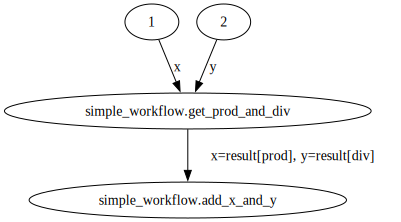

In [2]:
plot(file_name='workflow_simple.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='91b600f4af5f477facd703b8cfc12911' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow_simple.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

04/13/2025 07:08:44 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div1
04/13/2025 07:08:44 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEngine|update_task_state]: Task: get_prod_and_div1, type: PyFunction, finished.
04/13/2025 07:08:44 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y2
04/13/2025 07:08:44 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEngine|update_task_state]: Task: add_x_and_y2, type: PyFunction, finished.
04/13/2025 07:08:44 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
04/13/2025 07:08:45 AM <5059> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [125|WorkGraphEng

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow_simple.json", exe=exe).result()

In [10]:
result

2.5

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow_simple.json")

In [14]:
result = run_locally(flow)
result

2025-04-13 07:08:46,344 INFO Started executing jobs locally
2025-04-13 07:08:46,424 INFO Starting job - get_prod_and_div (b2add5f8-6b52-4f8a-9bca-8d71164d6cdf)
2025-04-13 07:08:46,426 INFO Finished job - get_prod_and_div (b2add5f8-6b52-4f8a-9bca-8d71164d6cdf)
2025-04-13 07:08:46,427 INFO Starting job - add_x_and_y (df6686df-0034-4449-a180-bf0d8179c1f4)
2025-04-13 07:08:46,428 INFO Finished job - add_x_and_y (df6686df-0034-4449-a180-bf0d8179c1f4)
2025-04-13 07:08:46,428 INFO Finished executing jobs locally


{'b2add5f8-6b52-4f8a-9bca-8d71164d6cdf': {1: Response(output={'prod': 2, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'df6686df-0034-4449-a180-bf0d8179c1f4': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## pyiron

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

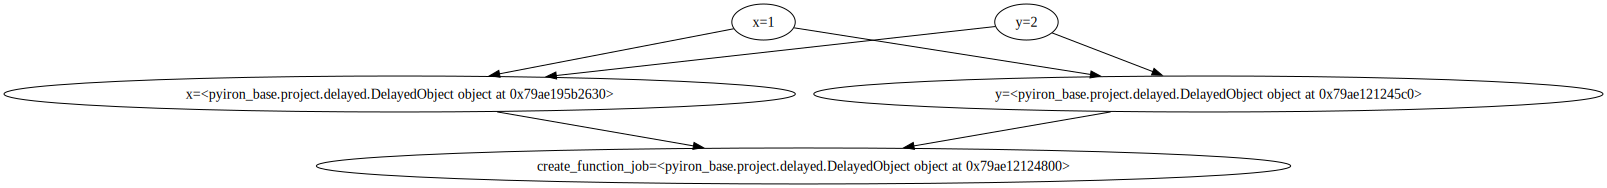

In [18]:
delayed_object_lst = load_workflow_json(project=pr, file_name="workflow_simple.json")
delayed_object_lst[-1].draw()

In [19]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3 was saved and received the ID: 1
The job add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48 was saved and received the ID: 2


2.5

In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3,/get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3,None,/home/jovyan/test/,2025-04-13 07:08:46.958268,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
1,2,finished,None,add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48,/add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48,None,/home/jovyan/test/,2025-04-13 07:08:47.080709,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None


## Python

In [21]:
from python_workflow_definition.purepython import load_workflow_json

In [22]:
load_workflow_json(file_name="workflow_simple.json")

2.5